Let us first import the libraries we will need for today's workshop. 

In [462]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


We will also need these dependencies so make sure you install them

In [463]:
pip install openpyxl

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Now let's open the data file as a dataframe. Note that so far we have worked with `.csv` files but Python can just as easily open and manipulate other file types like `excel`. Have a quick look at your data 

In [464]:
df = pd.read_excel("covid_dataset.xlsx")
df.head(10)

,Unnamed: 0,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language binary,Symtpm onset,tested date,COVID Symptom onset to imaging & cognitive testing (days),Admission to imaging & cognitive testing (days),Covid-19 severity (WHO Ordinal Scale),"Mechanical ventilation (1-Y,0-no)",Days mechanically ventilated,Trachy Y/N,"Lowest PaO2/FiO2 ratio (severity of lung injury, lower is worse)",Extrapulmonary organ dysfunction/support,Highest CRP during admission,Highest D-Dimer during admission,GAD-7,PHQ-9,PCL-5,GAD7 1.,GAD7 2.,GAD7 3.,GAD7 4.,GAD7 5.,GAD7 6.,GAD7 7.,PHQ9 1.,PHQ9 2.,PHQ9 3.,PHQ9 4.,PHQ9 5.,PHQ9 6.,PHQ9 7.,PHQ9 8.,PHQ9 9.,PHQ9 Difficulty,PCL5 1.,PCL5 2.,PCL5 3.,PCL5 4.,PCL5 5.,PCL5 6.,PCL5 7.,PCL5 8.,PCL5 9.,PCL5 10.,PCL5 11.,PCL5 12.,PCL5 13.,PCL5 14.,PCL5 15.,PCL5 16.,PCL5 17.,PCL5 18.,PCL5 19.,PCL5 20.,DRI_fourTowers,rs_TOL,rs_learningCurves,rs_manipulations2D,rs_motorControl,rs_prospectiveMemoryWords_1_delayed,rs_prospectiveMemoryWords_1_immediate,rs_spatialSpan,rs_targetDetection,rs_verbalAnalogies,RTDRI_fourTowers,RTrs_learningCurves,RTrs_manipulations2D,RTrs_TOL,RTrs_motorControl,RTrs_prospectiveMemoryWords_1_delayed,RTrs_prospectiveMemoryWords_1_immediate,RTrs_spatialSpan,RTrs_targetDetection,RTrs_verbalAnalogies
0,0,4133880.0,"""63""",2,Right,"Some college, no degree",Polish,Other,2020-05-05,NaT,38,34,6,1,14,N,8.0,Y,286,242,4,3,21,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1,1,3.0,3.0,1,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1,0.0,1.0,2.0,2.0,3.0,106.0,17.0,659.03,21.0,22.0,4.0,65.0,6.0,10242.0,50.764,4504.0,13709.0,13.0790,1041.0,1113.0,4245.5,1314.0,9054.0
1,1,4227668.0,"""70""",1,Right,O levels/GCSEs,English,english,2020-03-18,NaT,87,65,7,1,47,Y,10.0,Y,350,11593,1,0,5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0,8.0,118.0,17.0,733.57,19.0,22.0,4.0,32.0,11.0,11151.0,50.551,8262.0,11550.0,23.0550,1010.5,1066.0,2863.0,1686.0,6167.5
2,2,4105609.0,"""54""",1,Right,A levels,English,english,2020-03-22,NaT,97,90,6,1,28,Y,8.0,Y,399,3161,9,9,16,1.0,1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1,0,0.0,0.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3,0.0,2.0,2.0,10.0,10.0,119.0,18.0,659.67,18.0,22.0,5.0,63.0,8.0,11171.0,50.247,6937.0,9411.0,12.0190,800.5,930.0,2383.0,1079.0,4799.0
3,3,4105207.0,"""55""",2,Right,"Some college, no degree",English,English,2020-03-31,NaT,95,99,7,1,18,N,10.0,Y,405,861,4,5,13,0.0,1,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,2,0.0,2.0,2.0,-4.0,8.0,105.0,8.0,1041.30,21.0,18.0,5.0,35.0,21.0,12665.0,50.618,16940.0,11868.0,8.2759,1005.0,1676.5,2642.0,2030.5,3017.0
4,4,4239617.0,"""71""",1,Right,Doctoral degree,English,English,2020-03-10,NaT,121,111,7,1,50,Y,9.5,Y,367,952,0,0,3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,10.0,9.0,120.0,24.0,786.40,20.0,24.0,6.0,64.0,38.0,8612.5,50.792,4809.5,7010.0,28.4730,1010.0,999.0,5343.5,1376.5,3247.0
5,5,4303013.0,"""34""",2,Left,A levels,English,English,2020-04-22,NaT,93,16,5,0,0,N,NaN,N,281,235,15,11,39,2.0,1,3.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,2,3,3.0,2.0,1,3.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1,1.0,2.0,3.0,2.0,8.0,120.0,31.0,731.57,15.0,19.0,4.0,56.0,9.0,11621.0,50.539,3961.0,8700.5,14.9220,1298.0,1079.5,5281.0,1349.0,4610.0
6,6,3928857.0,"""61""",1,Left,Not done,English,English,2020-03-12,NaT,133,123,7,1,9,Y,8.5,Y,391,2985,13,10,6,2.0,2,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,3.0,2.0,2.0,2,3,2.0,2.0,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,2.0,2.0,2.0,7.0,118.0,19.0,575.67,19.0,20.0,5.0,38.0,3.0,21358.0,50.958,5902.0,15116.0,14.8830,729.0,846.5,5177.0,2259.0,3963.0
7,7,3929051.0,"""68""",1,NaN,Not done,English,English,2020-03-28,2020-08-07,132,not scanned,6,1,18,Y,12.

Notice that not all columns are shown, as Python has a cap on how many columns it can show in a table. To help us visually the data better, we will remove that cap.

In [465]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language binary,Symtpm onset,tested date,COVID Symptom onset to imaging & cognitive testing (days),Admission to imaging & cognitive testing (days),Covid-19 severity (WHO Ordinal Scale),"Mechanical ventilation (1-Y,0-no)",Days mechanically ventilated,Trachy Y/N,"Lowest PaO2/FiO2 ratio (severity of lung injury, lower is worse)",Extrapulmonary organ dysfunction/support,Highest CRP during admission,Highest D-Dimer during admission,GAD-7,PHQ-9,PCL-5,GAD7 1.,GAD7 2.,GAD7 3.,GAD7 4.,GAD7 5.,GAD7 6.,GAD7 7.,PHQ9 1.,PHQ9 2.,PHQ9 3.,PHQ9 4.,PHQ9 5.,PHQ9 6.,PHQ9 7.,PHQ9 8.,PHQ9 9.,PHQ9 Difficulty,PCL5 1.,PCL5 2.,PCL5 3.,PCL5 4.,PCL5 5.,PCL5 6.,PCL5 7.,PCL5 8.,PCL5 9.,PCL5 10.,PCL5 11.,PCL5 12.,PCL5 13.,PCL5 14.,PCL5 15.,PCL5 16.,PCL5 17.,PCL5 18.,PCL5 19.,PCL5 20.,DRI_fourTowers,rs_TOL,rs_learningCurves,rs_manipulations2D,rs_motorControl,rs_prospectiveMemoryWords_1_delayed,rs_prospectiveMemoryWords_1_immediate,rs_spatialSpan,rs_targetDetection,rs_verbalAnalogies,RTDRI_fourTowers,RTrs_learningCurves,RTrs_manipulations2D,RTrs_TOL,RTrs_motorControl,RTrs_prospectiveMemoryWords_1_delayed,RTrs_prospectiveMemoryWords_1_immediate,RTrs_spatialSpan,RTrs_targetDetection,RTrs_verbalAnalogies
0,0,4133880.0,"""63""",2,Right,"Some college, no degree",Polish,Other,2020-05-05,NaT,38,34,6,1,14,N,8.0,Y,286,242,4,3,21,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1,1,3.0,3.0,1,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1,0.0,1.0,2.0,2.0,3.0,106.0,17.0,659.03,21.0,22.0,4.0,65.0,6.0,10242.0,50.764,4504.0,13709.0,13.0790,1041.0,1113.0,4245.5,1314.0,9054.0
1,1,4227668.0,"""70""",1,Right,O levels/GCSEs,English,english,2020-03-18,NaT,87,65,7,1,47,Y,10.0,Y,350,11593,1,0,5,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0,8.0,118.0,17.0,733.57,19.0,22.0,4.0,32.0,11.0,11151.0,50.551,8262.0,11550.0,23.0550,1010.5,1066.0,2863.0,1686.0,6167.5
2,2,4105609.0,"""54""",1,Right,A levels,English,english,2020-03-22,NaT,97,90,6,1,28,Y,8.0,Y,399,3161,9,9,16,1.0,1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1,0,0.0,0.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3,0.0,2.0,2.0,10.0,10.0,119.0,18.0,659.67,18.0,22.0,5.0,63.0,8.0,11171.0,50.247,6937.0,9411.0,12.0190,800.5,930.0,2383.0,1079.0,4799.0
3,3,4105207.0,"""55""",2,Right,"Some college, no degree",English,English,2020-03-31,NaT,95,99,7,1,18,N,10.0,Y,405,861,4,5,13,0.0,1,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,2,0.0,2.0,2.0,-4.0,8.0,105.0,8.0,1041.30,21.0,18.0,5.0,35.0,21.0,12665.0,50.618,16940.0,11868.0,8.2759,1005.0,1676.5,2642.0,2030.5,3017.0
4,4,4239617.0,"""71""",1,Right,Doctoral degree,English,English,2020-03-10,NaT,121,111,7,1,50,Y,9.5,Y,367,952,0,0,3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1,0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,10.0,9.0,120.0,24.0,786.40,20.0,24.0,6.0,64.0,38.0,8612.5,50.792,4809.5,7010.0,28.4730,1010.0,999.0,5343.5,1376.5,3247.0


Now you can see all 79 columns. Please go through each column and try to understand what it is that it's measuring.

There is a lot of information contained in this dataset. But for today's tutorial we do not need all of this information. Let's try to curate a smaller dataset which only contains the variables that we are interested in. We are going to keep several demographic variables, some information about COVID19 severity and 3 the results of 3 cognitive tasks.

In [466]:
df2 = pd.concat([df.loc[:, "userID":"First Language binary"], df["Mechanical ventilation (1-Y,0-no)"], df.loc[:, "rs_spatialSpan":"rs_verbalAnalogies"]], axis=1)

In [467]:
df2.head()

,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language binary,"Mechanical ventilation (1-Y,0-no)",rs_spatialSpan,rs_targetDetection,rs_verbalAnalogies
0,4133880.0,"""63""",2,Right,"Some college, no degree",Polish,Other,1,4.0,65.0,6.0
1,4227668.0,"""70""",1,Right,O levels/GCSEs,English,english,1,4.0,32.0,11.0
2,4105609.0,"""54""",1,Right,A levels,English,english,1,5.0,63.0,8.0
3,4105207.0,"""55""",2,Right,"Some college, no degree",English,English,1,5.0,35.0,21.0
4,4239617.0,"""71""",1,Right,Doctoral degree,English,English,1,6.0,64.0,38.0


Our dataset looks a lot more manageable now! However, some of the variable names we have are not very intuitive. Let's change the name of the cognitive tasks so that it is easier to understand what they measure.

In [468]:
df2.rename(columns = {'rs_spatialSpan':'memory_spatialSpan', 'rs_verbalAnalogies':'language_verbalAnalogies', 'rs_targetDetection':'attention_targetDetection'}, inplace = True)
df2.head()

,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language binary,"Mechanical ventilation (1-Y,0-no)",memory_spatialSpan,attention_targetDetection,language_verbalAnalogies
0,4133880.0,"""63""",2,Right,"Some college, no degree",Polish,Other,1,4.0,65.0,6.0
1,4227668.0,"""70""",1,Right,O levels/GCSEs,English,english,1,4.0,32.0,11.0
2,4105609.0,"""54""",1,Right,A levels,English,english,1,5.0,63.0,8.0
3,4105207.0,"""55""",2,Right,"Some college, no degree",English,English,1,5.0,35.0,21.0
4,4239617.0,"""71""",1,Right,Doctoral degree,English,English,1,6.0,64.0,38.0


Try to change the column called `Qualifications` to `Education`

In [469]:
#CODE HERE

Now, let's look at the data types for each of our variables. We discussed these during the primer, but as a quick summary, it is important that the data type matches what we expect. Strings are usually saved as objects in python and numeric variables are saved as integers (int64) or float (float64). However, sometimes either due to humar error or due to the way the data is saved, Python might assign the wrong data type to your variables (e.g. numbers may be saved as strings). When this happens, statistical tests throw errors and so do certain plotting functions and it can take a while to figure out where the errors. Have a look at our data and see if you can spot any wrong data types.

In [470]:
df2.dtypes

userID                               float64
Age                                   object
Sex 1-Male 2-Female                    int64
Handedness                            object
Qualifications                        object
First Language                        object
First Language binary                 object
Mechanical ventilation (1-Y,0-no)      int64
memory_spatialSpan                   float64
attention_targetDetection            float64
language_verbalAnalogies             float64
dtype: object

It looks like Age was saved as an object, instead of integer. Let's change that. First, we get rid of the quotation marks around the numbers, then we tell python to convert those numbers to `int`

In [471]:
df2.Age = df["Age"].str.strip('\"') 


In [472]:
df2.Age = df2.Age.astype(int)

In [473]:
df2.dtypes # check that the changes have worked


userID                               float64
Age                                    int64
Sex 1-Male 2-Female                    int64
Handedness                            object
Qualifications                        object
First Language                        object
First Language binary                 object
Mechanical ventilation (1-Y,0-no)      int64
memory_spatialSpan                   float64
attention_targetDetection            float64
language_verbalAnalogies             float64
dtype: object

Now that we have all of our data in the right format, we may want to check if the values contained in the columns are consistent. If you have a look in the `First language binary` column you will notice that some of the values are capitalised while others are not. This is a problem as any statistics we run will assume that `english` and `English` are two distinct groups. To fix this, we can choose a consistent way to show this and stick with it.

In [474]:
df2['First Language binary'] = df2['First Language binary'].str.title()
df2.head()

,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language binary,"Mechanical ventilation (1-Y,0-no)",memory_spatialSpan,attention_targetDetection,language_verbalAnalogies
0,4133880.0,63,2,Right,"Some college, no degree",Polish,Other,1,4.0,65.0,6.0
1,4227668.0,70,1,Right,O levels/GCSEs,English,English,1,4.0,32.0,11.0
2,4105609.0,54,1,Right,A levels,English,English,1,5.0,63.0,8.0
3,4105207.0,55,2,Right,"Some college, no degree",English,English,1,5.0,35.0,21.0
4,4239617.0,71,1,Right,Doctoral degree,English,English,1,6.0,64.0,38.0


Try to do the same for the `Handedness` variable.

In [475]:
#CODE HERE

We may also wish to binarise some of our variables. This is usually done as specific statistical techniques require the data to be in a numeric format. So, it is always safer to have your data saved in a numeric format, wherever possible. For instance, the language variable is a good example where binarization would be useful. Let's see how this can be done below.

In [476]:
# Text Data of First Language is converted into Numeric Binary Data
df_one = pd.get_dummies(df2['First Language binary'])
print(df_one)

    English  Other
0         0      1
1         1      0
2         1      0
3         1      0
4         1      0
5         1      0
6         1      0
7         1      0
8         0      1
9         1      0
10        1      0
11        0      1
12        1      0
13        0      1
14        1      0
15        1      0
16        1      0
17        1      0
18        1      0
19        1      0
20        1      0
21        1      0
22        1      0
23        1      0
24        1      0
25        1      0
26        1      0
27        1      0
28        1      0
29        0      1
30        0      1
31        0      1
32        1      0
33        1      0
34        1      0
35        0      1
36        0      1
37        0      1
38        1      0
39        1      0
40        1      0
41        1      0
42        1      0
43        0      1
44        0      1
45        0      1
46        0      1
47        1      0
48        1      0
49        1      0


Note that the two variables that were outputted are each other's opposites, so we only need one of them. Let us choose the first one, though it does not matter which one you choose as long as you understand what the values represent.

In [477]:
df2["First Language binary"] = df_one.English #Replace the old values with the numeric ones
df2.rename(columns = {'First Language binary':'First Language 1-English 0-Other'}, inplace = True) #change the name of the column to something more meaningful
df2.head()

,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language 1-English 0-Other,"Mechanical ventilation (1-Y,0-no)",memory_spatialSpan,attention_targetDetection,language_verbalAnalogies
0,4133880.0,63,2,Right,"Some college, no degree",Polish,0,1,4.0,65.0,6.0
1,4227668.0,70,1,Right,O levels/GCSEs,English,1,1,4.0,32.0,11.0
2,4105609.0,54,1,Right,A levels,English,1,1,5.0,63.0,8.0
3,4105207.0,55,2,Right,"Some college, no degree",English,1,1,5.0,35.0,21.0
4,4239617.0,71,1,Right,Doctoral degree,English,1,1,6.0,64.0,38.0


Try to do apply the same concept of binarisation to the `Handedness` variable

In [478]:
#CODE HERE

Now, before moving forward we may also want to check the validity of the data. Are there any odd values that are not within the expected range? The best way to examine this is via plotting. Let's visualise some of the variables in the dataset

(array([10.,  0., 15.,  0.,  0., 18.,  0.,  4.,  0.,  1.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 10 artists>)

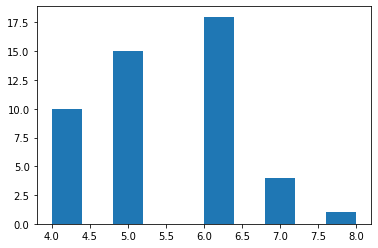

In [479]:
plt.hist(df2.memory_spatialSpan)

(array([ 2.,  5.,  1.,  4.,  4.,  5.,  6.,  4.,  6., 11.]),
 array([27. , 31.3, 35.6, 39.9, 44.2, 48.5, 52.8, 57.1, 61.4, 65.7, 70. ]),
 <BarContainer object of 10 artists>)

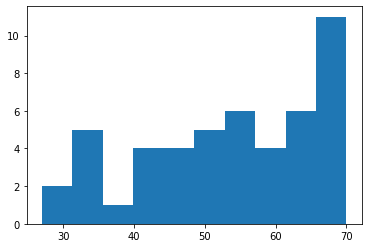

In [480]:
plt.hist(df2.attention_targetDetection)

(array([ 7.,  8.,  8., 10.,  2.,  5.,  5.,  1.,  0.,  2.]),
 array([-2. ,  2.3,  6.6, 10.9, 15.2, 19.5, 23.8, 28.1, 32.4, 36.7, 41. ]),
 <BarContainer object of 10 artists>)

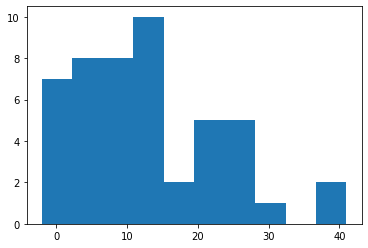

In [481]:
plt.hist(df2.language_verbalAnalogies)

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 28. ,  86.2, 144.4, 202.6, 260.8, 319. , 377.2, 435.4, 493.6,
        551.8, 610. ]),
 <BarContainer object of 10 artists>)

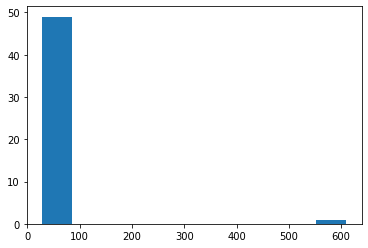

In [482]:
plt.hist(df2.Age)

We see that for the cognitive variables the data looks valid. However, when we look at age, one person seems to be over 600 years old! Unless we are dealing with a vampire, we may want to do something about this data. There are multiple ways to deal with this type of data but the simplest and most straightforward is to get rid of it, by replacing it with a NaN value.

40    610
Name: Age, dtype: int64


/var/folders/01/_3yj40_538g8lmscwcv139hm0000gp/T/ipykernel_35237/704062400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Age[df2.Age > 100] = np.NaN  #replace with NaNs anyone who is older than 100


(array([ 6.,  4.,  8.,  2., 10.,  3., 11.,  3.,  0.,  2.]),
 array([28. , 33.5, 39. , 44.5, 50. , 55.5, 61. , 66.5, 72. , 77.5, 83. ]),
 <BarContainer object of 10 artists>)

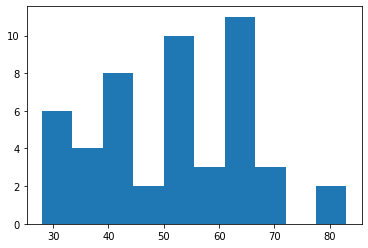

In [483]:
print(df2.Age[df2.Age > 100]) #show all the people who had an age over 100
df2.Age[df2.Age > 100] = np.NaN  #replace with NaNs anyone who is older than 100
plt.hist(df2.Age) #plot the new data


Check for the remaining variables if there is any data that is not valid. If you find anything, replace it with NaNs

Now that we have established that the data looks healthy, the next thing on the list is to check whether there are any duplicated values in our dataset. The easiest way to check this is via the number of unique user IDs. If we had no duplicates, then the number of unique IDs should correspond with the total number of rows in our data.

In [484]:
print(len(np.unique(df2.userID)))
print(len(df2.userID))

48
50


You can also use the `duplicated` function to obtain the same results.

In [485]:
sum(df2.duplicated()) 

2

It looks like we got two duplicates in our data. Let us try to remove them.

In [486]:

df2 = df2[~df2.duplicated()] #Have a look at lecture 8 if you don't remember this function
sum(df2.duplicated()) # calculate the number of duplicates again after removing them. If we were succcessful none should be there anymore.

0

We are almost done cleaning our data. Now let's check if there are any missing values. It's generally good practice to get rid of participants with missing data or replace those values with plausible estimates (like the mean/median). In this case, we will show the first. To find out if we have any missing values we can use the `isna` function. This returns True when there is a missing value and False when there isn't one.

In [487]:
df2.isna()

,userID,Age,Sex 1-Male 2-Female,Handedness,Qualifications,First Language,First Language 1-English 0-Other,"Mechanical ventilation (1-Y,0-no)",memory_spatialSpan,attention_targetDetection,language_verbalAnalogies
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


With big datasets it can be quite hard to visualise where the missing values are. So let's instead calculate the number of missing values that each person has.

In [488]:
sum_missing = df2.isna().sum(axis=1) #This shows us how many missing values each person has
print(sum_missing)  
print(sum(sum_missing > 0)) #how many people have at least one missing data


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
40    4
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    4
dtype: int64
3


Let's get rid of all the people who have at least one missing value

In [489]:
df2 = df2[~(sum_missing > 0)]

Another important check we need to perform is to look for outliers. These are often less easy to spot and sometimes it is unclear if one value is an outlier or not. Some may remove more extreme values only because it helps with their hypothesis, creating bias. Just because a value is extreme it does not always mean that it is wrong. However, if you don't do something about your outliers, they will likely bias your results and your data.

One robust, objective way to deal with outliers is via a process called winsorisation. This is replaces the extreme values in our data with slightly less extreme values, in order to limit the effect of the outliers on the calculations or the results. The mean value calculated after such replacement of the extreme values is called winsorized mean. 

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile. 

Let's see if our cognitive data requires any winsorisation by visualising it.

{'whiskers': [<matplotlib.lines.Line2D at 0x29173e2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29173e740>,
 'boxes': [<matplotlib.lines.Line2D at 0x29173e020>],
 'medians': [<matplotlib.lines.Line2D at 0x29173ec80>],
 'fliers': [<matplotlib.lines.Line2D at 0x29173ef20>],
 'means': []}

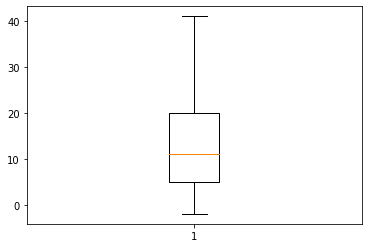

In [490]:
plt.boxplot(df2.language_verbalAnalogies)

{'whiskers': [<matplotlib.lines.Line2D at 0x2918983a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2918988e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x291898100>],
 'medians': [<matplotlib.lines.Line2D at 0x291898e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2918990c0>],
 'means': []}

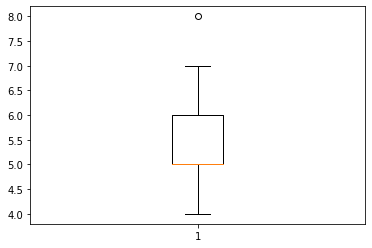

In [491]:
plt.boxplot(df2.memory_spatialSpan)

{'whiskers': [<matplotlib.lines.Line2D at 0x291908dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x291909300>,
 'boxes': [<matplotlib.lines.Line2D at 0x291908b20>],
 'medians': [<matplotlib.lines.Line2D at 0x291909720>],
 'fliers': [<matplotlib.lines.Line2D at 0x2919099c0>],
 'means': []}

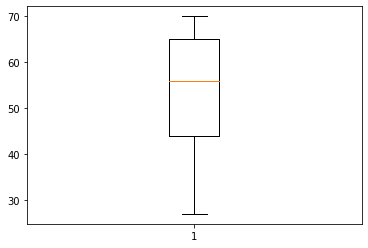

In [492]:
plt.boxplot(df2.attention_targetDetection)

Looking at the box plots, we can see that for the memory task, we have one person who performed really well. A score of 8 is plausible within this task, but not very common. For that reason, it is not valid for us to just remove it. Instead, let us apply the winsorisation procedure to replace the value with something a bit less extreme by replacing the values above the 95th percentile with the value of the score on the 95th percentile.

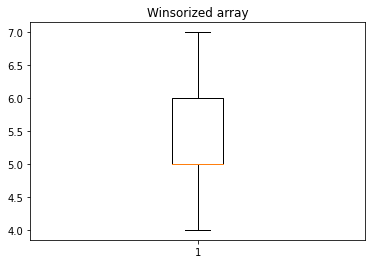

In [493]:
from scipy.stats.mstats import winsorize


winsorized_memory = winsorize(df2['memory_spatialSpan'],(0.05,0.05))  #apply winsorisation
  
plt.boxplot(winsorized_memory)  #visualise the data after winsorisation
plt.title('Winsorized array')
plt.show()

It now looks a lot better! Let's replace the old values in the memory task with the winsorised version.

In [494]:
df2['memory_spatialSpan'] = winsorized_memory

One final check, now that the data is in the right format and we are confident that it is correct, is to ensure everything is on the same scale. Different tasks will have different scoring mechanisms, on some tasks the scores may range from 4 to 8, while in others they may range between 30 and 70. This is often a problem as depending on the statistical test you use, if one variable has very large values, it will dominate over other variables. So the features with higher variability may receive more weight than the others even though in theory they should not.

If we look at our cognitive data, we can see that the tests are on different scales. To fix this, we can standardise our data so that each task has a mean of 0 and a standard deviation of 1. 

In [495]:
memory_task = (df2['memory_spatialSpan'] - df2['memory_spatialSpan'].mean())/df2['memory_spatialSpan'].std()

In [496]:
language_task = (df2['language_verbalAnalogies'] - df2['language_verbalAnalogies'].mean())/df2['language_verbalAnalogies'].std()

In [497]:
attention_task = (df2['attention_targetDetection'] - df2['attention_targetDetection'].mean())/df2['attention_targetDetection'].std()

In the above code we subtracted the mean values and divided by the standard deviation, to obtain standardised values. Then, we old values with the standardised ones. We can visualise these changes to better understand how our data looks now.

{'whiskers': [<matplotlib.lines.Line2D at 0x293a76140>,
 'caps': [<matplotlib.lines.Line2D at 0x293a76560>,
 'boxes': [<matplotlib.lines.Line2D at 0x293a75ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x293a76aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x293a76d40>],
 'means': []}

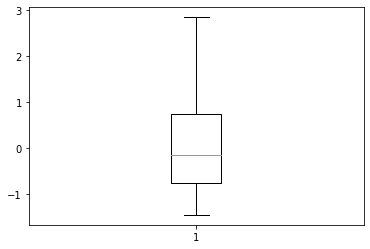

In [498]:
plt.boxplot(language_task)

{'whiskers': [<matplotlib.lines.Line2D at 0x293afc3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x293afc910>,
 'boxes': [<matplotlib.lines.Line2D at 0x293afc130>],
 'medians': [<matplotlib.lines.Line2D at 0x293afce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x293afd0f0>],
 'means': []}

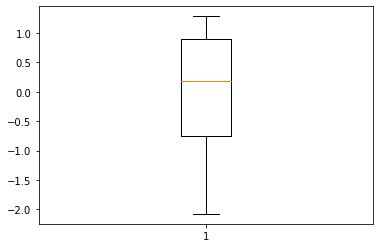

In [499]:
plt.boxplot(attention_task)

{'whiskers': [<matplotlib.lines.Line2D at 0x293b43520>,
 'caps': [<matplotlib.lines.Line2D at 0x293b43a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x293b43280>],
 'medians': [<matplotlib.lines.Line2D at 0x293b43fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x293b78280>],
 'means': []}

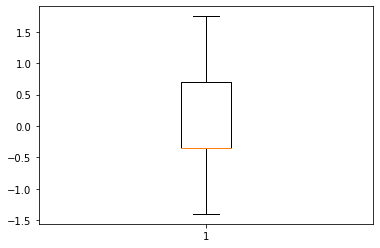

In [500]:
plt.boxplot(memory_task)

However, `standardisation` assumes that our data is normally distributed. If we look at the distributions of some of our cognitive tests we can see that some are not exactly normal. A different approach that does not assume a normal distribution is called `normalisation`. The formula for this is similar to the standardisation, but you use minimum and maximum values instead of mean and standard deviation

`X_normalised = (X - X_min) / (X_max - X_min)`

The output that you get is a scale where all the values range from 0 to 1 (and sometimes from -1 to 1). This approach is particularly useful when there are no outliers in your data. If the data has a lot of outliers that you cannot remove, then this method will not work very well, and it is recommended that you use `standardisation` instead. Since we made sure to get ride of outliers in our data, let's proceed with the `normalisation` technique.

In [501]:
df2['memory_spatialSpan'] = (df2['memory_spatialSpan'] - df2['memory_spatialSpan'].min())/(df2['memory_spatialSpan'].max() - df2['memory_spatialSpan'].min()) 

In [502]:
df2['language_verbalAnalogies'] = (df2['language_verbalAnalogies'] - df2['language_verbalAnalogies'].min())/(df2['language_verbalAnalogies'].max() - df2['language_verbalAnalogies'].min()) 

In [503]:
df2['attention_targetDetection'] = (df2['attention_targetDetection'] - df2['attention_targetDetection'].min())/(df2['attention_targetDetection'].max() - df2['attention_targetDetection'].min()) 

Great, we are finally done with all the concepts related to the data cleaning!

Now, we can perform statistical analyses on the data. For today's lecture we want to compare the COVID-19 patients to a set of controls. Let's open `demographics_day2` and have a look at the data. This contains approximately 15,000 data points of healthy participants with matching age, gender and language proficiency.

In [504]:
df_healthy = pd.read_excel('demographics_day2.xlsx')

Have a look at the variables.

In [505]:
df_healthy.head()

,SummaryScore_SpatialSpan,RT_SpatialSpan,user_id,SummaryScore_targetDetection,RT_targetDetection,SummaryScore_VerbalAnalogies,RT_VerbalAnalogies,Residence,Language binary,Ethnicity,Sex,Education,Handedness,Occupation,Salary,timepoint_by_date,Age,Imputation,Device Summary,Normative,Age squared,Age decade
0,8,5414.0,fc9b0048ab9e40a9aa823e195bd12043,49,1916.0,4,4722.0,United States,English,American Hispanic,Female,00_preGCSE,Right handed,Worker,Â£40-50K,tp1,27,0,Apple phone,0,729,20
1,7,3066.5,87f080fe66374700a2b54c350a560d20,71,886.0,16,3045.0,United Kingdom,English,American Hispanic,Female,00_preGCSE,Right handed,Worker,Â£10-20K,tp1,27,0,Android phone,0,729,20
2,7,2366.0,3c20040d-c5a7-4394-b7b4-daa04ca5f240,62,1303.0,22,2355.0,United Kingdom,English,American Hispanic,Female,00_preGCSE,Right handed,Worker,Â£0-10K,tp1,28,0,Apple phone,0,784,20
3,6,3332.5,3edc12d8ead348b094782ca9b74f8446,48,876.5,-9,4751.5,United Kingdom,English,American Hispanic,Female,00_preGCSE,Left handed,Worker,Â£30-40K,tp1,36,0,Apple phone,0,1296,30
4,5,1591.5,b1cc65d5aaa44aecb557747438897a41,43,2017.0,4,2597.0,United Kingdom,English,American Hispanic,Female,00_preGCSE,Right handed,Worker,Â£40-50K,tp1,38,0,Apple phone,0,1444,30


Notice there are quite a few we don't need, so we will just select the variables that we want to compare against the patients.

In [506]:
dfH = df_healthy[['SummaryScore_SpatialSpan', 'SummaryScore_VerbalAnalogies', 'SummaryScore_targetDetection', 'Age', 'Sex', 'Language binary']]

In [507]:
dfH.head()

,SummaryScore_SpatialSpan,SummaryScore_VerbalAnalogies,SummaryScore_targetDetection,Age,Sex,Language binary
0,8,4,49,27,Female,English
1,7,16,71,27,Female,English
2,7,22,62,28,Female,English
3,6,-9,48,36,Female,English
4,5,4,43,38,Female,English


Note that these variables have different names, and in some the data is saved in different formats (e.g. Sex, Language). Before we can compare the two groups we need to make sure that the two datasets are comparable. This process is commonly known as `harmonization` of data.

Let's first create binary variables for `language` and `sex`

In [508]:
lang_var = pd.get_dummies(dfH['Language binary'])
sex_var = pd.get_dummies(dfH['Sex'])
sex_var

Note that `Sex` here has a third option called `Other`. As the patients had no such option, the easiest sollution is to remove all the healthy people who have `Other` as their `Sex`.

In [509]:
dfH = dfH[~(sex_var["Other"]==1)]

In [510]:
lang_var = pd.get_dummies(dfH['Language binary'])
sex_var = pd.get_dummies(dfH['Sex'])
dfH['Language binary'] = lang_var.iloc[:,0]
dfH['Sex'] = sex_var.iloc[:,0] + 1

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15178,0,1
15179,0,1
15180,0,1
15181,0,1


We also remove any missing values before any missing values

In [513]:
sum_missing2 = dfH.isna().sum(axis=1) #This shows us how many missing values each person has
print(sum_missing2)  
dfH = dfH[~(sum_missing2 > 0)]

0        0
1        0
2        0
3        0
4        0
        ..
15178    0
15179    0
15180    0
15181    0
15182    0
Length: 14726, dtype: int64


Finally we normalise the memory task, and rename the columns in the healthy dataset to match those of the patients dataset.

In [514]:
dfH['SummaryScore_SpatialSpan'] = (dfH['SummaryScore_SpatialSpan'] - dfH['SummaryScore_SpatialSpan'].min())/(dfH['SummaryScore_SpatialSpan'].max() - dfH['SummaryScore_SpatialSpan'].min()) 

In [515]:
dfH.rename(columns = {'Language binary':'First Language 1-English 0-Other'}, inplace = True)
dfH.rename(columns = {'Sex':'Sex 1-Male 2-Female'}, inplace = True)
dfH.head()

,SummaryScore_SpatialSpan,SummaryScore_VerbalAnalogies,SummaryScore_targetDetection,Age,Sex 1-Male 2-Female,First Language 1-English 0-Other
0,0.428571,4,49,27,2,1
1,0.357143,16,71,27,2,1
2,0.357143,22,62,28,2,1
3,0.285714,-9,48,36,2,1
4,0.214286,4,43,38,2,1


We are finally ready for analysis!

What we will do now is perform an analysis called `Deviation from expected`. This analysis allows us to examine how far from the healthy norm are the patients in each task, with respect to their performance. Simply put, this analysis trains a linear regression model, using the healthy data, and then uses that to predict the performance of the patients. The linear regression model contains the `memory task` as the dependent variable and `Age`, `Sex` and `First Language` as predictors.

In [526]:
from sklearn.linear_model import LinearRegression


linr_model = LinearRegression().fit(dfH[["Age","Sex 1-Male 2-Female","First Language 1-English 0-Other"]], dfH['SummaryScore_SpatialSpan'])
DT_predict = linr_model.predict(df2[["Age","Sex 1-Male 2-Female","First Language 1-English 0-Other"]]) #Predictions on patient data
print(DT_predict)


[0.23627281 0.2498314  0.28158495 0.25189197 0.24784681 0.29356851
 0.26769278 0.23031902 0.29944633 0.26181496 0.23230362 0.30738471
 0.25214959 0.26173898 0.28166093 0.32127689 0.27166197 0.25983036
 0.23395463 0.29150794 0.25983036 0.30547609 0.28753875 0.26173898
 0.232046   0.24792278 0.28356955 0.2360152  0.28787234 0.27993395
 0.22403164 0.25189197 0.23998439 0.29581072 0.30374911 0.27398016
 0.25975439 0.30547609 0.28364552 0.32550371 0.30176451 0.25016499
 0.26207257 0.28364552 0.31135391]


In [517]:
print(linr_model.coef_)

[-0.0019846  -0.02770839 -0.00025762]


Calculate the deviation from expected by looking at the difference between the true score and the predicted score from the model

In [523]:
deviation_from_expected = df2["memory_spatialSpan"] - DT_predict

Plot to see how patients performed in relation to controls

(array([10.,  0.,  0., 11.,  4.,  0., 10.,  5.,  0.,  5.]),
 array([-0.32550371, -0.22111943, -0.11673515, -0.01235087,  0.09203341,
         0.19641768,  0.30080196,  0.40518624,  0.50957052,  0.6139548 ,
         0.71833907]),
 <BarContainer object of 10 artists>)

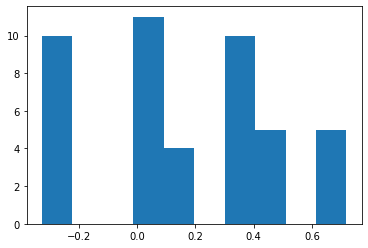

In [524]:
plt.hist(deviation_from_expected)

For memory it seems patients performed quite well, many above average.

Let's run a one sample t-test to examine whether this trend is significant. A sample t-test against zero is run as we expect to see a value of zero if there was absolutely no difference between patients and controls

In [525]:
# perform one sample t-test
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(a=deviation_from_expected, popmean=0)
print(t_statistic , p_value)

3.765983911178787 0.0004888211250593011


From this, we can see that patients actually performed statistically better than controls on memory tests.

But what about the other two tasks involving attention and language? Did the patients perform worse or better? Try to answer that question below. HINT: don't forget to normalise the data from the healthy dataset.

In [ ]:
#CODE HERE

What if we also include education and handedness in our regression model? Perform some harmonisation between the two datasets, such that there are only 3 types of education, pre-bachelor, BSc/MSc and PhD/MD. Then, include these in the regression model and check if your results change

In [ ]:
#CODE HERE